In [1]:
# importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

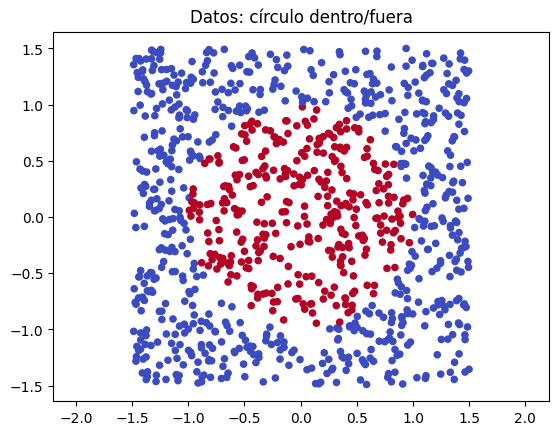

In [3]:
# 1. Generar puntos aleatorios
np.random.seed(42)
n_samples = 1000
X = np.random.uniform(-1.5, 1.5, (n_samples, 2))

# 2. Etiquetar: 1 si está dentro del círculo de radio 1, 0 si no
y = (X[:, 0]**2 + X[:, 1]**2 <= 1).astype(int)

# Visualizar puntos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20)
plt.axis('equal')
plt.title("Datos: círculo dentro/fuera")
plt.show()


Precisión en test (modelo lineal): 0.665


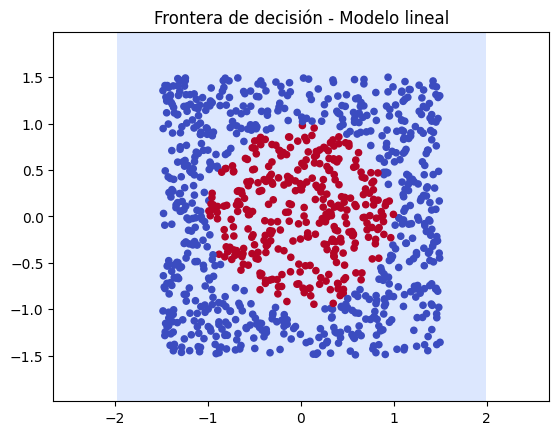

In [5]:
# Paso 2 — Entrenar un clasificador lineal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print("Precisión en test (modelo lineal):", log_reg.score(X_test, y_test))

# Función para graficar la frontera
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # resolución de la malla
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20)
    plt.axis('equal')
    plt.title(title)
    plt.show()

# Graficar frontera del modelo lineal
plot_decision_boundary(log_reg, X, y, "Frontera de decisión - Modelo lineal")
